In [28]:
# 3.5 新闻分类：多分类问题
# 加载路透社数据集
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)



In [29]:
len(train_data)

8982

In [30]:
len(test_data)

2246

In [31]:
# 每个样本都是一个整数列表（表示单词索引）
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [32]:
# 将索引解码为新闻文本
word_index = reuters.get_word_index()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [33]:
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [34]:
train_labels[10]

3

In [35]:
# 将数据向量化
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

# 数据向量化
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [36]:
# 将训练标签向量化
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 训练标签向量化
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


In [37]:
# keras内置方法
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [38]:
# 模型定义
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [39]:
# 编译模型
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy', # 分类交叉熵
    metrics=['accuracy']
)

In [40]:
# 留出验证集
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [41]:
# 训练模型
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data = (x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 79us/step - loss: 2.6373 - accuracy: 0.5204 - val_loss: 1.7260 - val_accuracy: 0.6250
Epoch 2/20
7982/7982 [==============================] - 0s 59us/step - loss: 1.4405 - accuracy: 0.6909 - val_loss: 1.3076 - val_accuracy: 0.7120
Epoch 3/20
7982/7982 [==============================] - 0s 58us/step - loss: 1.0846 - accuracy: 0.7679 - val_loss: 1.1579 - val_accuracy: 0.7520
Epoch 4/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.8643 - accuracy: 0.8180 - val_loss: 1.0420 - val_accuracy: 0.7830
Epoch 5/20
7982/7982 [==============================] - 0s 58us/step - loss: 0.6911 - accuracy: 0.8480 - val_loss: 1.0369 - val_accuracy: 0.7760
Epoch 6/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.5585 - accuracy: 0.8800 - val_loss: 0.9541 - val_accuracy: 0.8030
Epoch 7/20
7982/7982 [==============================] - 0s 57us/step - loss: 0.447

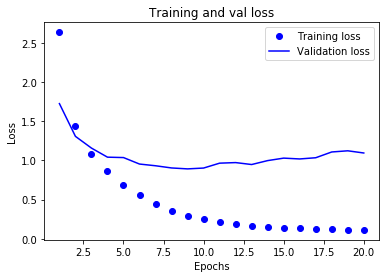

In [42]:
# 绘制训练损失和验证损失
import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

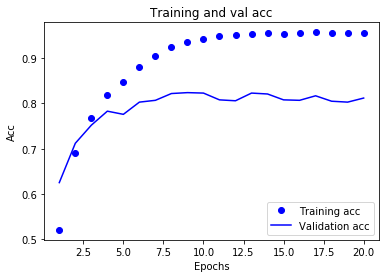

In [43]:
# 绘制训练精度和验证精度
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and val acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [44]:
# 从头开始重新训练一个模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 68us/step - loss: 2.6556 - accuracy: 0.5198 - val_loss: 1.7394 - val_accuracy: 0.6330
Epoch 2/9
7982/7982 [==============================] - 0s 57us/step - loss: 1.4062 - accuracy: 0.7060 - val_loss: 1.2781 - val_accuracy: 0.7160
Epoch 3/9
7982/7982 [==============================] - 0s 56us/step - loss: 1.0397 - accuracy: 0.7803 - val_loss: 1.1304 - val_accuracy: 0.7660
Epoch 4/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.8205 - accuracy: 0.8264 - val_loss: 1.0223 - val_accuracy: 0.7810
Epoch 5/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.6561 - accuracy: 0.8624 - val_loss: 0.9595 - val_accuracy: 0.7930
Epoch 6/9
7982/7982 [==============================] - 0s 56us/step - loss: 0.5275 - accuracy: 0.8885 - val_loss: 0.9424 - val_accuracy: 0.7920
Epoch 7/9
7982/7982 [==============================] - 0s 57us/step - loss: 0.4282 - acc

In [45]:
results

[1.001210433929389, 0.7831701040267944]

In [46]:
# 在新数据上生成预测结果
predictions = model.predict(x_test)

In [47]:
# 每个元素都是长度为46的向量
predictions[0].shape

(46,)

In [48]:
# 向量所有元素总和为1
np.sum(predictions[0])

1.0000001

In [49]:
# 最大的元素就是预测类别，既概率最大的类别
np.argmax(predictions[0])

3

In [50]:
# 具有信息瓶颈的模型
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) # 中间层的维度远远小于64的时候，造成信息瓶颈
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val)
)
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 84us/step - loss: 3.0247 - accuracy: 0.3349 - val_loss: 2.4355 - val_accuracy: 0.3710
Epoch 2/20
7982/7982 [==============================] - 1s 70us/step - loss: 2.0868 - accuracy: 0.4698 - val_loss: 1.7172 - val_accuracy: 0.5910
Epoch 3/20
7982/7982 [==============================] - 1s 70us/step - loss: 1.4812 - accuracy: 0.6185 - val_loss: 1.4781 - val_accuracy: 0.6230
Epoch 4/20
7982/7982 [==============================] - 1s 69us/step - loss: 1.2619 - accuracy: 0.6614 - val_loss: 1.4051 - val_accuracy: 0.6410
Epoch 5/20
7982/7982 [==============================] - 1s 71us/step - loss: 1.1157 - accuracy: 0.6994 - val_loss: 1.3524 - val_accuracy: 0.6740
Epoch 6/20
7982/7982 [==============================] - 1s 72us/step - loss: 0.9958 - accuracy: 0.7442 - val_loss: 1.3453 - val_accuracy: 0.6810
Epoch 7/20
7982/7982 [==============================] - 1s 74us/step - loss: 0.897

In [51]:
results 

[2.0467655962318156, 0.687889575958252]

In [52]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [53]:
from tensorflow.python.client import device_lib
import tensorflow as tf

print(device_lib.list_local_devices())
print(tf.test.is_built_with_cuda())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 4673827610499358936
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7030246605
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13355581424244697790
physical_device_desc: "device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:07:00.0, compute capability: 7.5"
]
True


In [54]:
import tensorflow as tf
print (tf.__version__)
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

1.14.0
Default GPU Device: /device:GPU:0
